In [19]:
from math import pi
from math import sin
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import decomposition

def plot_arrow(ax, start, stop):
    ax.annotate('', xytext = start, xy = stop,
               arrowprops = dict(facecolor = 'red', width = 2.0))

def corr_vars(start = -10, stop = 10, step = 0.5, mu = 0, sigma = 3, func = lambda x: x):
    x = np.arange(start, stop, step)

    e = np.random.normal(mu, sigma, x.size)
    
    y = np.zeros(x.size)
    
    for ind in range(x.size):
        y[ind] = func(x[ind]) + e[ind]
    
    return (x, y)

In [4]:
np.random.seed(100)

(x1, x2) = corr_vars(start = 2, stop = 4, step = 0.2, sigma = 2, func = lambda x: 2*math.sin(x))

A = np.column_stack((x1, x2))

In [5]:
A

array([[ 2.        , -1.68093609],
       [ 2.2       ,  2.30235361],
       [ 2.4       ,  3.65699797],
       [ 2.6       ,  0.52613067],
       [ 2.8       ,  2.63261787],
       [ 3.        ,  1.3106777 ],
       [ 3.2       ,  0.32561105],
       [ 3.4       , -2.65116887],
       [ 3.6       , -1.26403255],
       [ 3.8       , -0.71371289]])

(-4, 4)

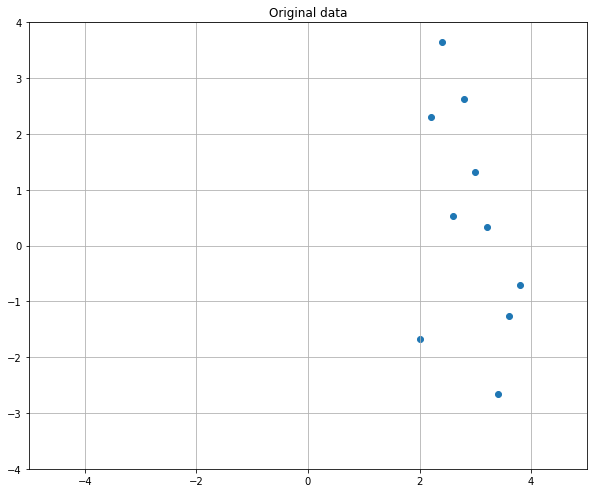

In [6]:
f, ax = plt.subplots(figsize = (10, 10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Original data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5, 5])
plt.ylim([-4, 4])

In [7]:
A = (A - np.mean(A, axis = 0))

In [8]:
A

array([[-0.9       , -2.12538994],
       [-0.7       ,  1.85789977],
       [-0.5       ,  3.21254412],
       [-0.3       ,  0.08167682],
       [-0.1       ,  2.18816403],
       [ 0.1       ,  0.86622385],
       [ 0.3       , -0.1188428 ],
       [ 0.5       , -3.09562271],
       [ 0.7       , -1.7084864 ],
       [ 0.9       , -1.15816674]])

(-4, 4)

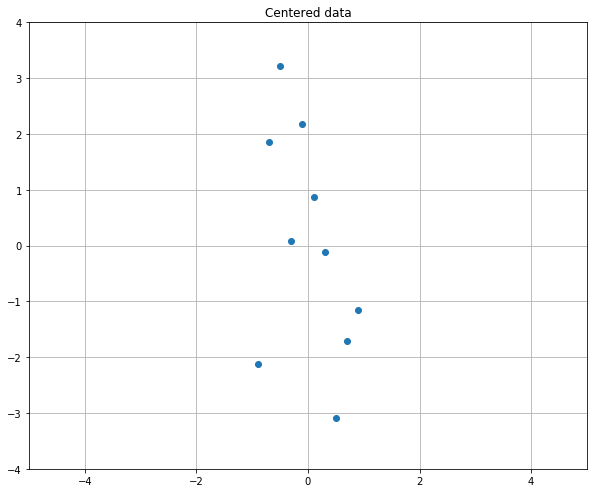

In [9]:
f, ax = plt.subplots(figsize = (10, 10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Centered data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5, 5])
plt.ylim([-4, 4])

In [10]:
evecs, eigenvalues, V = np.linalg.svd(A.T, full_matrices = False)

In [11]:
evecs

array([[-0.14027773,  0.9901122 ],
       [ 0.9901122 ,  0.14027773]])

In [12]:
eigenvalues

array([ 6.19647908,  1.61106079])

In [15]:
x = []
y = []
for i in range (-4, 4):
    x.append(i)
    y.append(evecs[1, 0] * i / evecs[0, 0])

a = []
b = []
for i in range (-4, 4):
    a.append(i)
    b.append(evecs[1, 1] * i / evecs[0, 1])

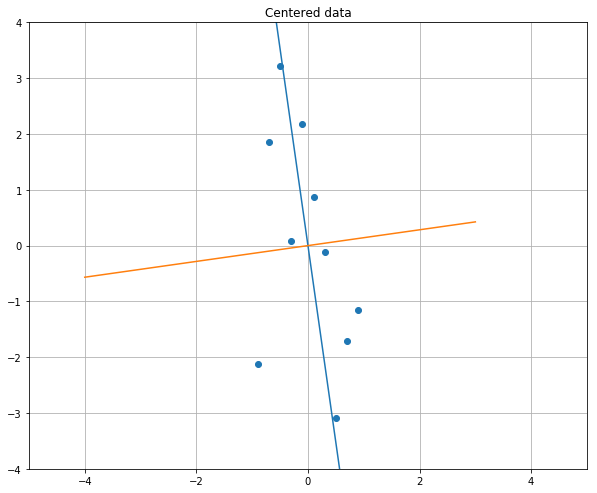

In [16]:
f, ax = plt.subplots(figsize = (10, 10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Centered data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5, 5])
plt.ylim([-4, 4])
ax.plot(x, y, linestyle = '-')
ax.plot(a, b, linestyle = '-')

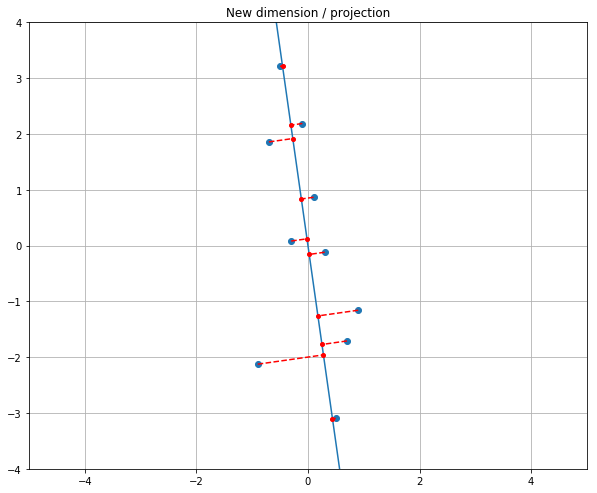

In [18]:
f, ax = plt.subplots(figsize = (10, 10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("New dimension / projection")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5, 5])
plt.ylim([-4, 4])
ax.plot(x, y, linestyle = '-')

p0 = [x[0], y[0]]
p1 = [x[len(x) - 1], y[len(x) - 1]]

a = np.array([[p1[0] - p0[0], p1[1] - p0[1]],
             [p0[1] - p1[1], p1[0] - p0[0]]])

for i in range(0, len(A)):
    q = A[i]
    
    b = -np.array([-q[0] * (p1[0] - p0[0]) - q[1] * (p1[1] - p0[1]),
                  -p0[1] * (p1[0] - p0[0]) + p0[0] * (p1[1] - p0[1])])
    
    proj = np.linalg.solve(a, b)
    
    ax.plot(proj[0], proj[1], 'bo', markersize = 4, color = 'red')
    ax.plot((q[0], proj[0]), (q[1], proj[1]), linestyle = '--', color = 'red')

In [24]:
np.random.seed(100)

(x1, x2) = corr_vars(start = 2, stop = 4, step = 0.2, sigma = 2, func = lambda x: 2*math.sin(x))

A = np.column_stack((x1, x2))

Aorig = A

A

array([[ 2.        , -1.68093609],
       [ 2.2       ,  2.30235361],
       [ 2.4       ,  3.65699797],
       [ 2.6       ,  0.52613067],
       [ 2.8       ,  2.63261787],
       [ 3.        ,  1.3106777 ],
       [ 3.2       ,  0.32561105],
       [ 3.4       , -2.65116887],
       [ 3.6       , -1.26403255],
       [ 3.8       , -0.71371289]])

(-4, 5)

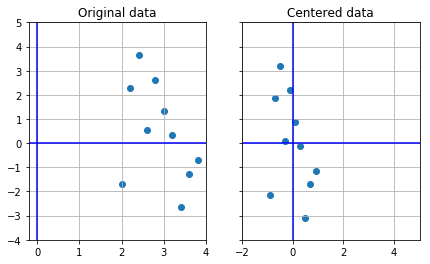

In [26]:
A = (A - np.mean(A, axis = 0))

# Plot the original matrix
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (7, 4))
ax1.scatter(Aorig[:,0], Aorig[:,1])
ax1.set_title("Original data")
ax1.grid(True)

# Plot the centered data
ax2.scatter(A[:,0], A[:,1])
ax2.set_title("Centered data")
ax2.grid(True)

ax1.axhline(0, color = "blue")
ax1.axvline(0, color = "blue")
ax2.axhline(0, color = "blue")
ax2.axvline(0, color = "blue")


plt.xlim([-2, 5])
plt.ylim([-4, 5])

In [27]:
S = np.dot(A.T, A)/(A.shape[0] - 1)

print("The covariance matrix is:")
print(S, "\n")

The covariance matrix is:
[[ 0.36666667 -0.55248919]
 [-0.55248919  4.18798554]] 



Vector slope:  [-0.]


(-5, 5)

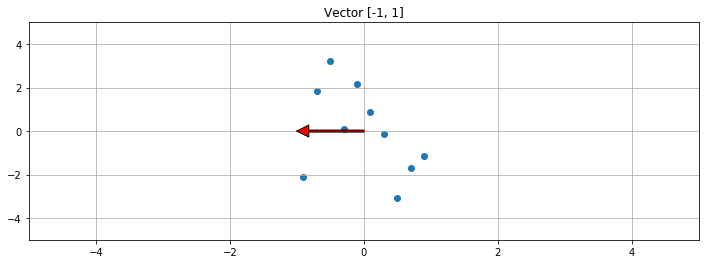

In [28]:
f, ax1 = plt.subplots(1, 1, sharey = True, figsize = (12, 4))

V = np.array([[-1], [0]])
print("Vector slope: ", V[1]/V[0])
ax1.scatter(A[:,0], A[:,1])
ax1.set_title("Vector [-1, 1]")
ax1.grid(True)
ax1.plot([0, V[0]], [0, V[1]], c = 'r')
plot_arrow(ax1, (0, 0), (V[0], V[1]))
plt.xlim([-5, 5])
plt.ylim([-5, 5])

Vector slope:  [-1.50678871]


(-5, 5)

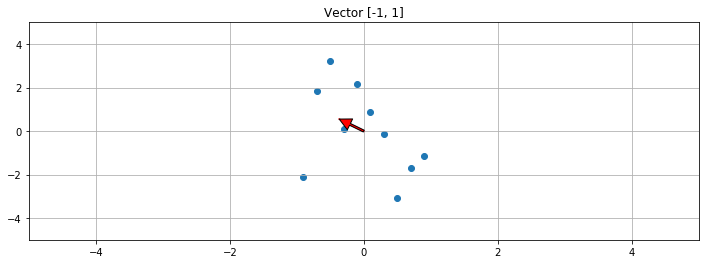

In [29]:
f, ax1 = plt.subplots(1, 1, sharey = True, figsize = (12, 4))

V = np.dot(S, V)
print("Vector slope: ", V[1]/V[0])
ax1.scatter(A[:,0], A[:,1])
ax1.set_title("Vector [-1, 1]")
ax1.grid(True)
ax1.plot([0, V[0]], [0, V[1]], c = 'r')
plot_arrow(ax1, (0, 0), (V[0], V[1]))
plt.xlim([-5, 5])
plt.ylim([-5, 5])

Vector slope:  [-5.72313052]


(-5, 5)

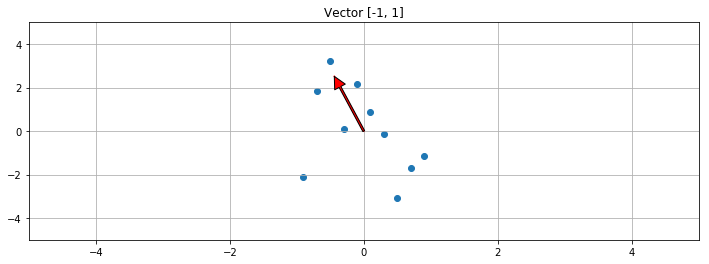

In [30]:
f, ax1 = plt.subplots(1, 1, sharey = True, figsize = (12, 4))

V = np.dot(S, V)
print("Vector slope: ", V[1]/V[0])
ax1.scatter(A[:,0], A[:,1])
ax1.set_title("Vector [-1, 1]")
ax1.grid(True)
ax1.plot([0, V[0]], [0, V[1]], c = 'r')
plot_arrow(ax1, (0, 0), (V[0], V[1]))
plt.xlim([-5, 5])
plt.ylim([-5, 5])

Vector slope:  [-6.94911232]


(-5, 5)

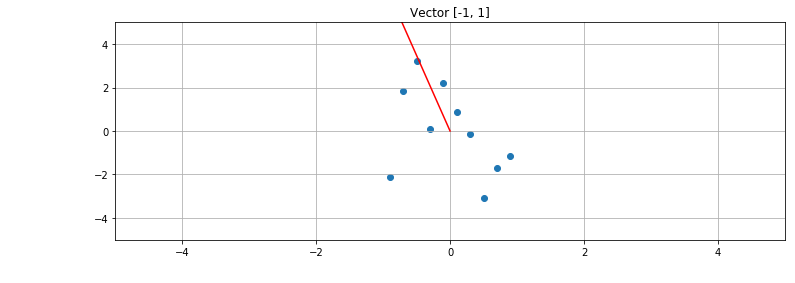

In [31]:
f, ax1 = plt.subplots(1, 1, sharey = True, figsize = (12, 4))

V = np.dot(S, V)
print("Vector slope: ", V[1]/V[0])
ax1.scatter(A[:,0], A[:,1])
ax1.set_title("Vector [-1, 1]")
ax1.grid(True)
ax1.plot([0, V[0]], [0, V[1]], c = 'r')
plot_arrow(ax1, (0, 0), (V[0], V[1]))
plt.xlim([-5, 5])
plt.ylim([-5, 5])

In [32]:
print("The slope of the vector converges to the direction of greatest variance:\n")

V = np.dot(S, V)
print("Vector slope: ", V[1]/V[0])
V = np.dot(S, V)
print("Vector slope: ", V[1]/V[0])
V = np.dot(S, V)
print("Vector slope: ", V[1]/V[0])
V = np.dot(S, V)
print("Vector slope: ", V[1]/V[0])
V = np.dot(S, V)
print("Vector slope: ", V[1]/V[0])
V = np.dot(S, V)
print("Vector slope: ", V[1]/V[0])

The slope of the vector converges to the direction of greatest variance:

Vector slope:  [-7.0507464]
Vector slope:  [-7.0577219]
Vector slope:  [-7.05819391]
Vector slope:  [-7.05822582]
Vector slope:  [-7.05822798]
Vector slope:  [-7.05822813]


In [33]:
l_1 = (S.trace() + np.sqrt(pow(S.trace(), 2) - 4 * np.linalg.det(S))) / 2 
l_2 = (S.trace() - np.sqrt(pow(S.trace(), 2) - 4 * np.linalg.det(S))) / 2

print("The eigenvalues are:")
print("L1: ", l_1)
print("L2: ", l_2)

The eigenvalues are:
L1:  4.26626144724
L2:  0.288390761711


In [34]:
A1 = S - l_1 * np.identity(2)
A2 = S - l_2 * np.identity(2)

E1 = A2[:, 1]
E2 = A1[:, 0]

E1 = E1 / np.linalg.norm(E1)
E2 = E2 / np.linalg.norm(E2)

print("The eigenvectors are:")
print("E1: ", E1)
print("E2: ", E2)

The eigenvectors are:
E1:  [-0.14027773  0.9901122 ]
E2:  [-0.9901122  -0.14027773]


In [35]:
E = np.column_stack((E1, E2))

E

array([[-0.14027773, -0.9901122 ],
       [ 0.9901122 , -0.14027773]])

In [36]:
# sanity test using numpy to do the same thing

evals, evecs = np.linalg.eigh(S)

print(evals)
print(evecs)

[ 0.28839076  4.26626145]
[[-0.9901122  -0.14027773]
 [-0.14027773  0.9901122 ]]


(-4, 5)

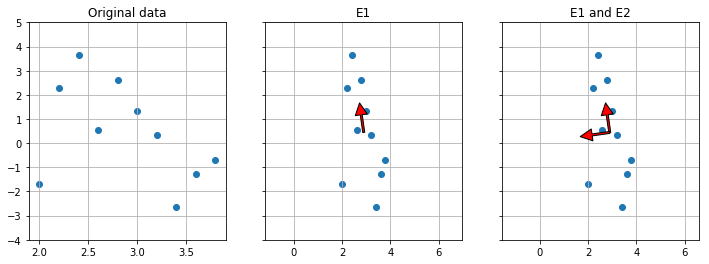

In [37]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (12, 4))
ax1.scatter(Aorig[:,0], Aorig[:,1])
ax1.set_title("Original data")
ax1.grid(True)

ax2.scatter(Aorig[:,0], Aorig[:,1])
ax2.set_title("E1")
ax2.grid(True)
plot_arrow(ax2, np.mean(Aorig, axis = 0), np.mean(Aorig, axis = 0) + np.dot(Aorig, E).std(axis=0).mean() * E1)
ax2.set_aspect('equal')

ax3.scatter(Aorig[:,0], Aorig[:,1])
ax3.set_title("E1 and E2")
ax3.grid(True)
plot_arrow(ax3, np.mean(Aorig, axis = 0), np.mean(Aorig, axis = 0) + np.dot(Aorig, E).std(axis=0).mean() * E1)
plot_arrow(ax3, np.mean(Aorig, axis = 0), np.mean(Aorig, axis = 0) + np.dot(Aorig, E).std(axis=0).mean() * E2)
ax3.set_aspect('equal')

plt.xlim([0, 5])
plt.ylim([-4, 5])

In [38]:
F1 = np.dot(A, E1)
F2 = np.dot(A, E2)

F = np.column_stack((F1, F2))
F

array([[-1.97812455,  1.18924584],
       [ 1.93772363,  0.43245658],
       [ 3.25091797,  0.04440771],
       [ 0.12295254,  0.28557622],
       [ 2.18055566, -0.20793946],
       [ 0.84363103, -0.22052313],
       [-0.15975102, -0.28036266],
       [-3.13515266, -0.06080918],
       [-1.78978762, -0.45341595],
       [-1.27296497, -0.72863598]])

In [39]:
# Sanity check Scikit Learn implimentation

pca = decomposition.PCA(n_components = 2)
print(pca.fit_transform(A))

[[-1.97812455  1.18924584]
 [ 1.93772363  0.43245658]
 [ 3.25091797  0.04440771]
 [ 0.12295254  0.28557622]
 [ 2.18055566 -0.20793946]
 [ 0.84363103 -0.22052313]
 [-0.15975102 -0.28036266]
 [-3.13515266 -0.06080918]
 [-1.78978762 -0.45341595]
 [-1.27296497 -0.72863598]]
